# ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

### **Постановка задачи**
Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

В процессе анализа вы должны ответить на ключевые вопросы HR-агентства:

- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Какие факторы влияют на зарплату у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в различных компаниях?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
- Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:

- тесты для количественного признака:
- для одной выборки;
- для двух выборок;
- для нескольких выборок;
- тест для категориальных признаков.

### **Загружаем данные**

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2")

In [2]:
import pandas as pd

# загружаем датасет
ds_salary = pd.read_csv('ds_salaries.csv')
ds_salary.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


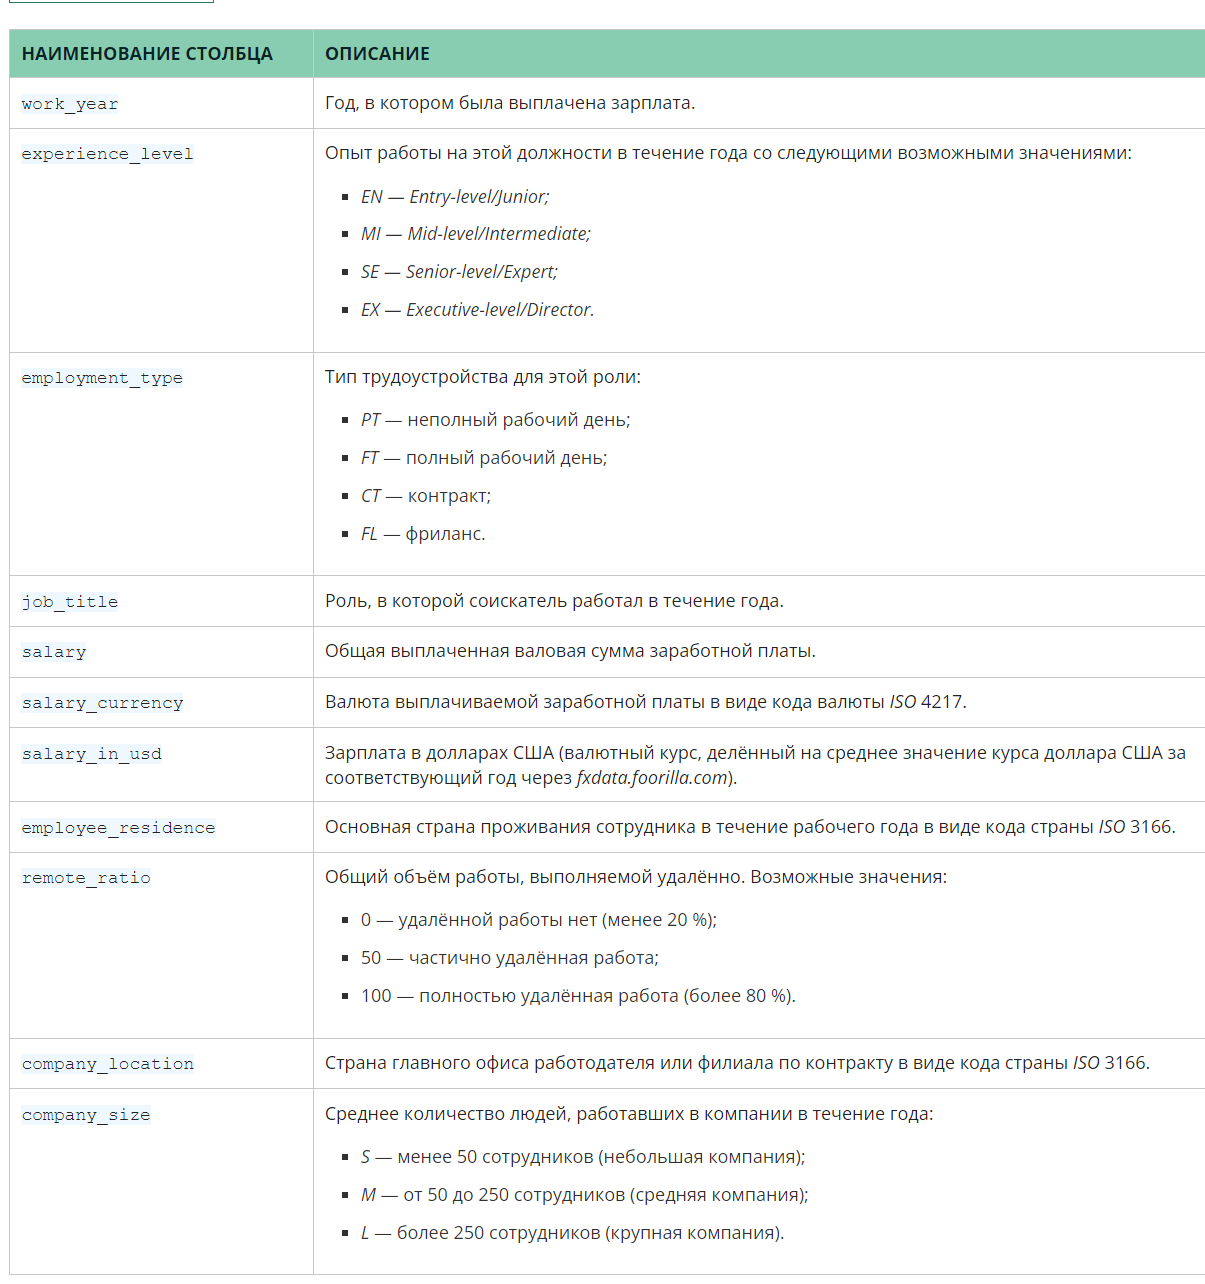

In [3]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## **Описательный анализ данных**

In [4]:
ds_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В датасете 607 записей (без пропущенных значений).

Проверим данные на наличие полных дубликатов:

In [5]:
print('Количество дубликатов: {}'.format(ds_salary[ds_salary.duplicated()].shape[0]))

# Удаляем дубликаты:
ds_salary = ds_salary.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(ds_salary.shape))

Количество дубликатов: 0
Размер таблицы после удаления дубликатов: (607, 12)


В таблице не оказалось дубликатов 

## **Создание признаков**

**Создадим 5 признаков локации компаний: EU, RU, CH, UA**

In [6]:
ds_salary['company_location'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [7]:
list_EU = str('BE BG CZ DK DE EE IE  EL ES FR HR IT CY LV LT LU HU MT NL AT PL PT RO SI SK FI SE' )
list_EU = list_EU.split(' ')
def country_group(x):
    if x in list_EU:
        return 'EU'
    elif x == 'RU':
        return 'RU'
    elif x== 'UA':
        return 'UA'
    elif x== 'CH':
        return 'CH'

In [8]:
ds_salary['EU_RU_CH_UA'] = ds_salary['company_location'].apply(country_group)
ds_salary[ds_salary['EU_RU_CH_UA'] == 'RU']

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,EU_RU_CH_UA
160,160,2021,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L,RU
161,161,2021,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M,RU


In [9]:
 # Создадим признак для стран EU
list_EU = str('BE BG CZ DK DE EE IE  EL ES FR HR IT CY LV LT LU HU MT NL AT PL PT RO SI SK FI SE' )
list_EU = list_EU.split(' ')
ds_salary['EU'] = ds_salary['company_location'].apply(lambda x: 'EU' if x in list_EU else 0)

# Создадим признак для CH
ds_salary['CH'] = ds_salary['company_location'].apply(lambda x: 'CH' if x =='CH' else 0)

# Создадим признак для RU
ds_salary['RU'] = ds_salary['company_location'].apply(lambda x: 'RU' if x =='RU' else 0)

# Создадим признак для UA
ds_salary['UA'] = ds_salary['company_location'].apply(lambda x: 'UA' if x =='UA' else 0)



**Создадим признак Data Scientist и Data Engineer**

In [10]:
# создадим функцию которая будет возвращать нам необходимую профессию.
def job (x):
    if  x=='Data Scientist':
        return 'Data Scientist'
    elif  x=='Data Engineer':
        return 'Data Engineer'

In [11]:
# применим функцию к столбцу job_title, результат запишем в новый столбец 'Data_Scientist_Data_Engineer'
ds_salary['Data_Scientist_Data_Engineer'] = ds_salary['job_title'].apply(job)

## **Распределение зарплат у специалистов Data Scientist**

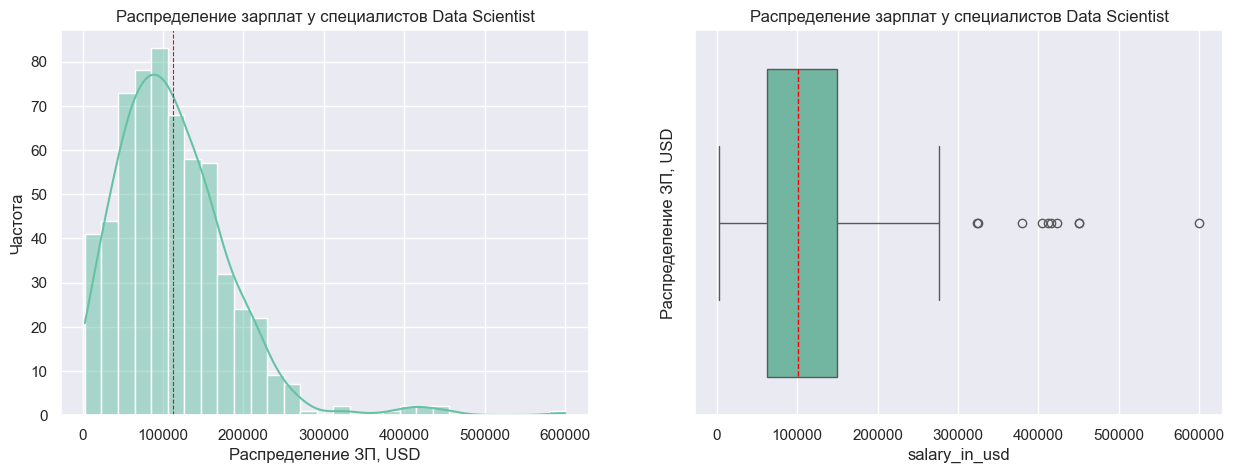

In [12]:
fig, axes = plt.subplots(1,2, figsize = (15, 5))

sns.histplot(ds_salary['salary_in_usd'], kde=True, ax = axes[0])
axes[0].set(xlabel = 'Распределение ЗП, USD', ylabel = 'Частота')
axes[0].set_title('Распределение зарплат у специалистов Data Scientist')
axes[0].axvline(ds_salary['salary_in_usd'].mean(), color='red', linestyle = '--', linewidth = 0.8)

sns.boxplot(ds_salary['salary_in_usd'], ax = axes[1], orient='h', medianprops = {"color": "red", "linestyle":'--'})
axes[1].set(ylabel = 'Распределение ЗП, USD')
axes[1].set_title('Распределение зарплат у специалистов Data Scientist')

plt.show()

In [13]:
ds_salary_agg = ds_salary['salary_in_usd'].describe().round(2).to_frame()
ds_salary_agg.columns = ['ЗП, USD']
ds_salary_agg

,"ЗП, USD"
count,607.00
mean,112297.87
std,70957.26
min,2859.00
25%,62726.00
50%,101570.00
75%,150000.00
max,600000.00


**Исследование**

Распределение ЗП отлично от нормального, имеются выбросы

#### **1 Распределение ЗП в USD в зависимости от Опыта работы**

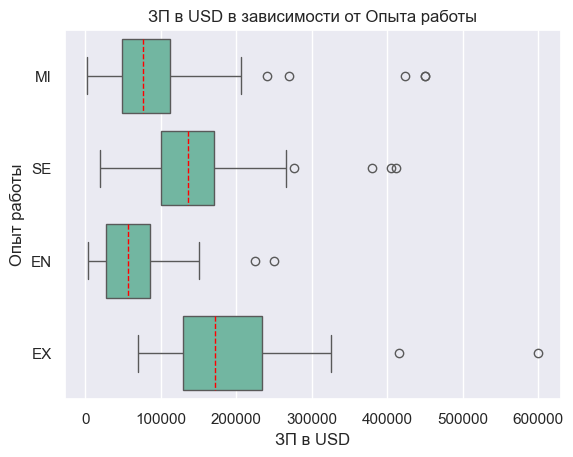

In [14]:
ax = sns.boxplot(ds_salary, x = 'salary_in_usd', y = 'experience_level', orient='h', medianprops = {"color": "red", "linestyle": '--'})
ax.set(xlabel = 'ЗП в USD', ylabel = 'Опыт работы')
plt.title('ЗП в USD в зависимости от Опыта работы')
plt.show()

In [15]:
ds_salary_agg = ds_salary.groupby('experience_level')['salary_in_usd'].describe().round(2)
print('ЗП в USD в зависимости от Опыта работы')
ds_salary_agg

ЗП в USD в зависимости от Опыта работы


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.32,44395.54,4000.0,27505.0,56500.0,85425.75,250000.0
EX,26.0,199392.04,117071.26,69741.0,130006.5,171437.5,233750.00,600000.0
MI,213.0,87996.06,63901.06,2859.0,48000.0,76940.0,112000.00,450000.0
SE,280.0,138617.29,57691.98,18907.0,100000.0,135500.0,170000.00,412000.0


**Исследование**

Наблюдается прямая зависимость уровня ЗП от опыта работы. 

####  **2 Влияние типа трудоустройства на ЗП**

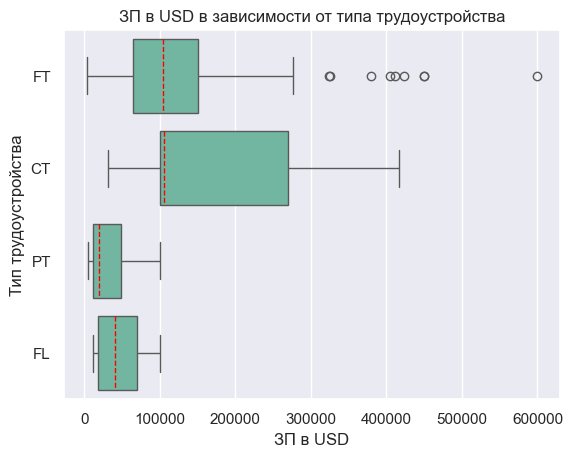

In [16]:
ax = sns.boxplot(ds_salary, x = 'salary_in_usd', y = 'employment_type', orient='h', medianprops = {"color": "red", "linestyle": '--'})
ax.set(xlabel = 'ЗП в USD', ylabel = 'Тип трудоустройства')
plt.title('ЗП в USD в зависимости от типа трудоустройства')
plt.show()

**Исследование**

Самые низкие ЗП у "Частичной занятости", самые высокие у "Контрактного" типа занятости.

####  **3 Влияние объема трудоустройства выполняемой удаленно на ЗП**

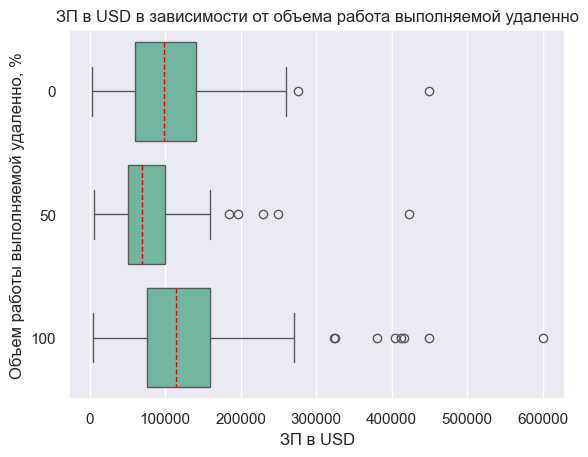

In [17]:
ax = sns.boxplot(ds_salary, x = 'salary_in_usd', y = 'remote_ratio', orient='h', medianprops = {"color": "red", "linestyle": '--'})
ax.set(xlabel = 'ЗП в USD', ylabel = 'Объем работы выполняемой удаленно, %')
plt.title('ЗП в USD в зависимости от объема работа выполняемой удаленно')
plt.show()




**Исследование**

Самые высокие ЗП у "полностью удаленной работы", самые низкие - "частично удаленной работы"

## **Ежегодное распределение зарплат у специалистов Data Scientist** 

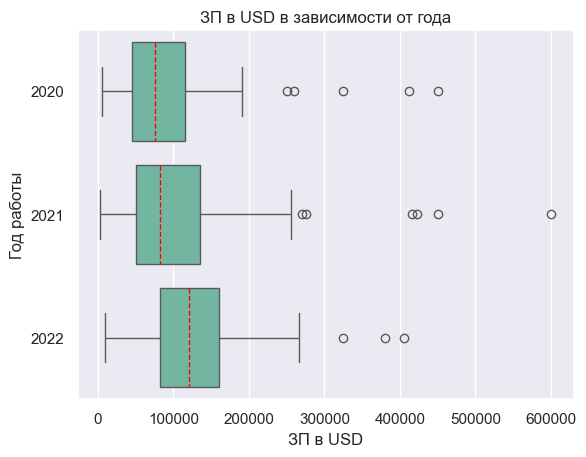

In [18]:
ax = sns.boxplot(ds_salary, x = 'salary_in_usd', y = 'work_year', orient='h', medianprops = {"color": "red", "linestyle": '--'})
ax.set(xlabel = 'ЗП в USD', ylabel = 'Год работы')
plt.title('ЗП в USD в зависимости от года')
plt.show()

plt.show()

In [19]:
ds_salary_agg = ds_salary.groupby('work_year')['salary_in_usd'].describe().round(2)
print('ЗП в USD в зависимости от года')
ds_salary_agg

ЗП в USD в зависимости от года


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.00,82831.80,5707.0,45724.5,75544.0,115526.0,450000.0
2021,217.0,99853.79,80225.11,2859.0,50000.0,82528.0,135000.0,600000.0
2022,318.0,124522.01,58183.65,10000.0,81666.0,120000.0,160000.0,405000.0


**Исследование**

На первый взгляд распределения ЗП в зависимости от года различны. В среднем с каждым годом ЗП уровень ЗП повышается. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистическое тестирование.

## **Соотношение зарплаты Data Scientist и Data Engineer в различных компаниях.**

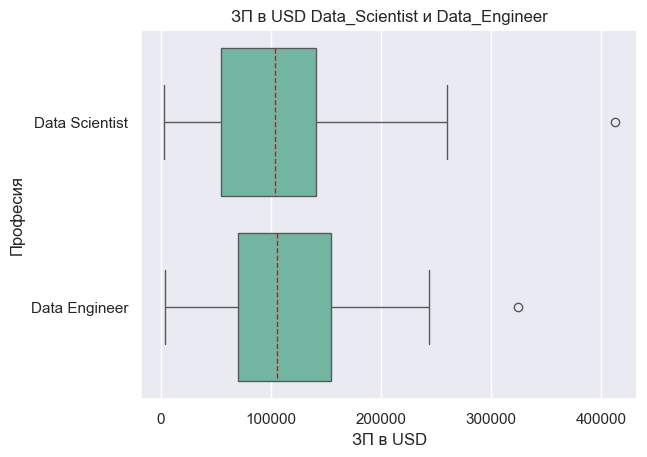

In [20]:
ax = sns.boxplot(ds_salary, x = 'salary_in_usd', y = 'Data_Scientist_Data_Engineer', orient='h', medianprops = {"color": "red", "linestyle": '--'})
ax.set(xlabel = 'ЗП в USD', ylabel = 'Професия')
plt.title('ЗП в USD Data_Scientist и Data_Engineer')
plt.show()

**Исследование**

ЗП Data engineer немного выше чем Data Scientist. 

## **Соотношение зарплаты Data Scientist и Data Engineer и размером компании.**

Text(0, 0.5, 'ЗП в USD Data_Scientist и Data_Engineer')

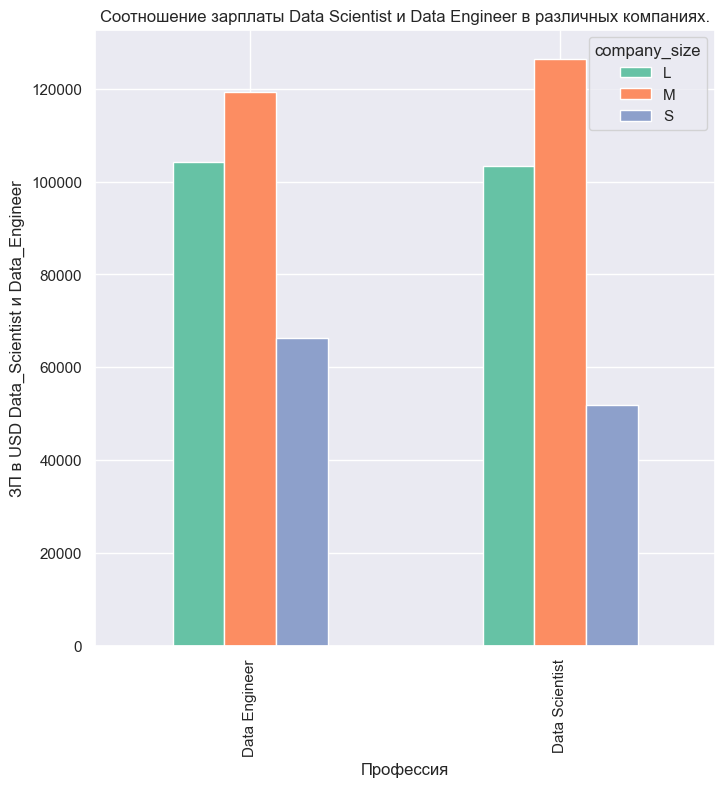

In [21]:
pivot = ds_salary.pivot_table('salary_in_usd', index = 'Data_Scientist_Data_Engineer', columns= 'company_size', fill_value=0)
fig_7, axes_7 = plt.subplots(figsize=(8, 8)) 
pivot.plot( kind='bar', ax=axes_7 )
axes_7.set_title('Соотношение зарплаты Data Scientist и Data Engineer в различных компаниях.') 
axes_7.set_xlabel('Профессия') 
axes_7.set_ylabel('ЗП в USD Data_Scientist и Data_Engineer') 

**Исследование**
* В S_компаниях: ЗП Data Engineer выше, чем Data Scientist.
* В M_компаниях: Наоборот ЗП Data Scientist выше, чем Data Engineer.
* В L_компаниях: ЗП в среднем одинаковы.


## **Соотношение количества должностей Data Scientist и Data Engineer в различных компаниях.**

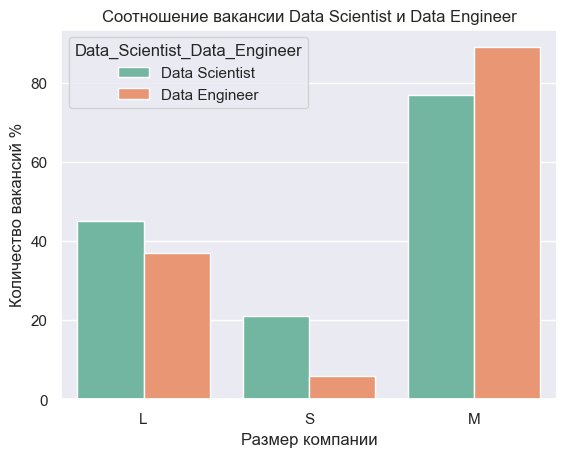

In [22]:
ax = sns.countplot(data=ds_salary, x=ds_salary['company_size'], hue='Data_Scientist_Data_Engineer')
ax.set(xlabel='Размер компании', ylabel='Количество вакансий %')
plt.title('Соотношение вакансии Data Scientist и Data Engineer')
plt.show()

**Исследование**
* В S_компаниях: Количество  вакансий Data Scientist намного больше чем Data Engineer.
* В L_компаниях: Соотношение количества вакансий вакансий Data Scientist также больше чем Data Engineer но не существенно. 
* В M_компаниях: Наоборот количества вакансий Data Engineer выше, чем Data Scientist.


## **Соотношение зарплаты Data Scientist и Data Engineer в EU, RU, CH, UA**

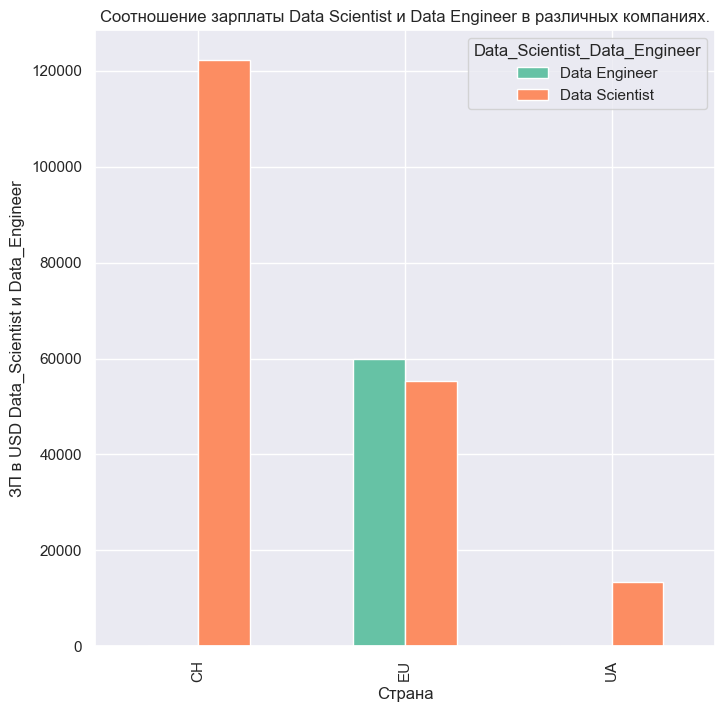

In [23]:
pivot = ds_salary.pivot_table('salary_in_usd', index ='EU_RU_CH_UA' , columns= 'Data_Scientist_Data_Engineer', fill_value=0)
fig_7, axes_7 = plt.subplots(figsize=(8, 8)) 
pivot.plot( kind='bar', ax=axes_7 )
axes_7.set_title('Соотношение зарплаты Data Scientist и Data Engineer в различных компаниях.') 
axes_7.set_xlabel('Страна') 
axes_7.set_ylabel('ЗП в USD Data_Scientist и Data_Engineer')
plt.show()

## **Статистический анализ данных**

In [24]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

###  ***Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?***

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): Размер ЗП не изменяется с годами .

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): Размер ЗП увеличивается с годами.

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [25]:
# За какие года предоставлены данны?
ds_salary['work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

In [26]:
# Значения ЗП профессии Data Scientist за года 2020 , 2021, 2022
salary_2020 = ds_salary.loc[(ds_salary['work_year'] == 2020) & (ds_salary['Data_Scientist_Data_Engineer'] == 'Data Scientist'), 'salary' ]
salary_2021 = ds_salary.loc[(ds_salary['work_year'] == 2021) & (ds_salary['Data_Scientist_Data_Engineer'] == 'Data Scientist'), 'salary' ]
salary_2022 = ds_salary.loc[(ds_salary['work_year'] == 2022) & (ds_salary['Data_Scientist_Data_Engineer'] == 'Data Scientist'), 'salary' ]

# проводим тест Шапиро-Уилка
print('Год 2020:')
result = stats.shapiro(salary_2020)
decision_normality(result[1])

print('Год 2021:')
result = stats.shapiro(salary_2021)
decision_normality(result[1])

print('Год 2022:')
result = stats.shapiro(salary_2022)
decision_normality(result[1])

Год 2020:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Год 2021:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Год 2022:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер ЗП»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать Краскела-Уолиса д

**Проведём тест**

In [27]:
# проводим тест
_, p = stats.kruskal(salary_2020,salary_2021,salary_2022)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Размер ЗП для специалистов Data Science растут с каждым годом.

### ***Какие факторы влияют на зарплату у специалистов Data Scientist?***

####  **1 Влияние опыта работы на ЗП**

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер ЗП не изменяется в зависимости от опыта: EN ($μ_1$), MI ($μ_2$), SE ($μ_3$), EX ($μ_4$).

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$

*Альтернативная гипотеза*: размер ЗП изменяется в зависимости от опыта: EN ($μ_1$), MI ($μ_2$), SE ($μ_3$), EX ($μ_4$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [28]:
# ЗП для различных степеней опыта работы
salary_EN = ds_salary.loc[(ds_salary['experience_level'] == 'EN'),  'salary' ]
salary_MI = ds_salary.loc[(ds_salary['experience_level'] == 'MI'),  'salary' ]
salary_SE = ds_salary.loc[(ds_salary['experience_level'] == 'SE') , 'salary' ]
salary_EX = ds_salary.loc[(ds_salary['experience_level'] == 'EX') , 'salary' ]

# проводим тест Шапиро-Уилка
print('Enrty -level/Junior')
result = stats.shapiro(salary_EN)
decision_normality(result[1])

print('Mid-level/Intermediate')
result = stats.shapiro(salary_MI)
decision_normality(result[1])

print('Senior-level/Expert')
result = stats.shapiro(salary_SE)
decision_normality(result[1])

print('Executive-level/Director')
result = stats.shapiro(salary_EX)
decision_normality(result[1])


Enrty -level/Junior
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Mid-level/Intermediate
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Senior-level/Expert
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Executive-level/Director
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Уровень ЗП»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [29]:
# проводим тест
_, p = stats.kruskal(salary_EN, salary_MI, salary_EX, salary_SE)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

ЗП различны от степени опыта работы. 

####  **2 Влияние типа трудоустройства на ЗП**

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер ЗП не изменяется в зависимости от типа трудоустройства: PT ($μ_1$), FT ($μ_2$), CT ($μ_3$), FL ($μ_4$).

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$

*Альтернативная гипотеза*: размер ЗП изменяется в зависимости от типа трудоустройства: PT ($μ_1$), FT ($μ_2$), CT ($μ_3$), FL ($μ_4$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [30]:
# ЗП в зависимости от типа трудоустройства
salary_PT = ds_salary.loc[(ds_salary['employment_type'] == 'PT'),  'salary' ]
salary_FT = ds_salary.loc[(ds_salary['employment_type'] == 'FT'),  'salary' ]
salary_CT = ds_salary.loc[(ds_salary['employment_type'] == 'CT'),  'salary' ]
salary_FL = ds_salary.loc[(ds_salary['employment_type'] == 'FL'),  'salary' ]
# проводим тест Шапиро-Уилка

print('Не полный день')
result = stats.shapiro(salary_PT)
decision_normality(result[1])

print('Полный день')
result = stats.shapiro(salary_FT)
decision_normality(result[1])

print('Контракт')
result = stats.shapiro(salary_CT)
decision_normality(result[1])

print('Фрилансер')
result = stats.shapiro(salary_FL)
decision_normality(result[1])

Не полный день
p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Полный день
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Контракт
p-value = 0.425
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Фрилансер
p-value = 0.507
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**
Для Полного Рабочего дня и Не полного рабочего дня проведем непараметрический тест
Для Контракта  и Фрилансера проведем параметрический тест

***Для Полного Рабочего дня и Не полного рабочего дня проведем -  непараметрический тест***

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Уровень ЗП»? — Количественный.
* Сколько сравниваемых групп? — 2.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — нет. 

Для проверки нашей гипотезы можно использовать критерий Манна -Уитни

**Проведём тест*

In [31]:
# проводим тест
_, p = stats.mannwhitneyu(salary_PT, salary_FT)
decision_hypothesis(p)

p-value = 0.007
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


***Для Контракта  и Фрилансера проведем параметрический тест***

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Уровень ЗП»? — Количественный.
* Сколько сравниваемых групп? — 2.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — да. 

Для проверки нашей гипотезы можно использовать критерий Двухвыборочный t-критерий

In [32]:
# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(salary_CT, salary_FL)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')



Тест на равенство дисперсий
p-value = 0.271
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.


In [33]:
# проводим тест
_, p = stats.ttest_ind(salary_CT, salary_FL, alternative='greater', equal_var=True )
decision_hypothesis(p)

p-value = 0.070
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

ЗП отличаются при типе трудоустройства "Полный рабочий день" и "Не полный рабочий день".

При работе по "Контракту" или "Фрилансер", у нас нет оснований отвергать нулевую гипотезу

####  **3 Влияние объема трудоустройства выполняемой удаленно на ЗП**

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер ЗП не изменяется в зависимости от объема работы выполняемой удаленно: 0% ($μ_1$), 50% ($μ_2$), 100% ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3 $$

*Альтернативная гипотеза*: размер ЗП изменяется в зависимости от объема работы выполняемой удаленно: 0% ($μ_1$), 50% ($μ_2$), 100% ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [34]:
# ЗП в зависимости от объема работа выполняемой удаленно
salary_0 = ds_salary.loc[(ds_salary['remote_ratio'] == 0),  'salary' ]
salary_50 = ds_salary.loc[(ds_salary['remote_ratio'] == 50),  'salary' ]
salary_100 = ds_salary.loc[(ds_salary['remote_ratio'] == 100),  'salary' ]

# проводим тест Шапиро-Уилка

print('Удаленной работы нет')
result = stats.shapiro(salary_0)
decision_normality(result[1])

print('Частичная удаленная работа')
result = stats.shapiro(salary_50)
decision_normality(result[1])

print('Полностью удаленная работа')
result = stats.shapiro(salary_100)
decision_normality(result[1])



Удаленной работы нет
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Частичная удаленная работа
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Полностью удаленная работа
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Уровень ЗП»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [35]:
# проводим тест
_, p = stats.kruskal(salary_0, salary_50, salary_100)
decision_hypothesis(p)

p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

ЗП различны от объема работа выполняемой удаленно

### ***Есть ли взаимосвязь между объемом выполняемой работы удаленно и размером компании?***

**Сформулируем нулевую и альтернативные гипотезы**
*Нулевая гипотеза*: Между объемом выполняемой работы удаленно и размером компании нет взаимосвязи

*Альтернативная гипотеза*: Между объемом выполняемой работы удаленно и размером компании есть взаимосвязи

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Пол»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [36]:
# вычисляем таблицу сопряжённости
table = pd.crosstab(ds_salary['company_size'], ds_salary['remote_ratio'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

print('p-value = {:.3f}'.format(p))
decision_hypothesis(p)

p-value = 0.000
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Существует статистически значимая взаимосвязь между между объемом выполняемой работы удаленно и размером компании.

### ***Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?***

**Сформулируем нулевую и альтернативные гипотезы**
*Нулевая гипотеза*: Между наличием должностей Data Scientist и Data Engineer и размером компании нет взаимосвязи

*Альтернативная гипотеза*: Между наличием должностей Data Scientist и Data Engineer и размером компании есть взаимосвязи

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Пол»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [37]:
# вычисляем таблицу сопряжённости
table = pd.crosstab(ds_salary['company_size'], ds_salary['Data_Scientist_Data_Engineer'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

print('p-value = {:.3f}'.format(p))
decision_hypothesis(p)

p-value = 0.008
p-value = 0.008
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

У нас нет основания утверждать, что есть связь между наличием должностей Data Scientist и Data Engineer и размером компании


## Итоговые результаты исследования

- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist. 
- На зарплату у специалистов Data Scientist влиют факторы: 

        1. Опыт работы,

        2. Тип занятости,

        3. Объем работы выполняемый удаленно,
        
        4. Страна регистрации компании.
        
- Зарплаты  Data Engineer в среднем немного выше, чем Data Scientist в различных компаниях?
- У нас нет основания утверждать, что есть связь между наличием должностей Data Scientist и Data Engineer и размером компании
- Существует статистически значимая взаимосвязь между между объемом выполняемой работы удаленно и размером компании.



